## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [6]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
#MOMENTUM = 0.95
MOMENTUM = 0.85

In [18]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0717 15:28:28.928697   276 deprecation_wrapper.py:119] From c:\users\kehua\.conda\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 15:28:28.929673   276 deprecation_wrapper.py:119] From c:\users\kehua\.conda\envs\keras\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 15:28:28.975573   276 deprecation_wrapper.py:119] From c:\users\kehua\.conda\envs\keras\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 15:28:29.042957   276 deprecation.py:323] From c:\users\kehua\.conda\envs\keras\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for upd

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.9075 - acc: 0.3147 - val_loss: 1.7612 - val_acc: 0.3667
Epoch 2/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6996 - acc: 0.3973 - val_loss: 1.7071 - val_acc: 0.4005
Epoch 3/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.6141 - acc: 0.4264 - val_loss: 1.5722 - val_acc: 0.4457
Epoch 4/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5506 - acc: 0.4502 - val_loss: 1.5487 - val_acc: 0.4538
Epoch 5/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4990 - acc: 0.4687 - val_loss: 1.5102 - val_acc: 0.4585
Epoch 6/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.4605 - acc: 0.4815 - val_loss: 1.4827 - val_acc: 0.4709
Epoch 7/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4226 - acc: 0.4944 - val_loss: 1.4496 - val_

50000/50000 [==============================] - 5s 92us/step - loss: 1.9519 - acc: 0.3175 - val_loss: 1.9056 - val_acc: 0.3287
Epoch 3/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.8696 - acc: 0.3437 - val_loss: 1.8435 - val_acc: 0.3467
Epoch 4/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.8188 - acc: 0.3611 - val_loss: 1.8096 - val_acc: 0.3629
Epoch 5/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7821 - acc: 0.3747 - val_loss: 1.7718 - val_acc: 0.3767
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.7536 - acc: 0.3842 - val_loss: 1.7413 - val_acc: 0.3904
Epoch 7/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.7273 - acc: 0.3946 - val_loss: 1.7197 - val_acc: 0.3937
Epoch 8/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7035 - acc: 0.4047 - val_loss: 1.6988 - val_acc: 0.4004
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 5s 100us/step - loss: 2.1770 - acc: 0.2324 - val_loss: 2.1554 - val_acc: 0.2404
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.1368 - acc: 0.2481 - val_loss: 2.1184 - val_acc: 0.2589
Epoch 5/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.1023 - acc: 0.2637 - val_loss: 2.0864 - val_acc: 0.2684
Epoch 6/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.0727 - acc: 0.2738 - val_loss: 2.0586 - val_acc: 0.2779
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.0471 - acc: 0.2836 - val_loss: 2.0348 - val_acc: 0.2864
Epoch 8/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.0244 - acc: 0.2925 - val_loss: 2.0139 - val_acc: 0.2968
Epoch 9/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.0045 - acc: 0.3003 - val_loss: 1.9953 - val_acc: 0.3064
Epoch 10/50
50000/50000 [==========================

50000/50000 [==============================] - 5s 90us/step - loss: 2.2868 - acc: 0.1258 - val_loss: 2.2845 - val_acc: 0.1328
Epoch 5/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.2798 - acc: 0.1378 - val_loss: 2.2782 - val_acc: 0.1434
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 2.2740 - acc: 0.1486 - val_loss: 2.2727 - val_acc: 0.1538
Epoch 7/50
50000/50000 [==============================] - 5s 99us/step - loss: 2.2687 - acc: 0.1596 - val_loss: 2.2675 - val_acc: 0.1625
Epoch 8/50
50000/50000 [==============================] - 5s 98us/step - loss: 2.2636 - acc: 0.1679 - val_loss: 2.2625 - val_acc: 0.1700
Epoch 9/50
50000/50000 [==============================] - 5s 101us/step - loss: 2.2587 - acc: 0.1742 - val_loss: 2.2577 - val_acc: 0.1741
Epoch 10/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.2540 - acc: 0.1793 - val_loss: 2.2531 - val_acc: 0.1775
Epoch 11/50
50000/50000 [=======================

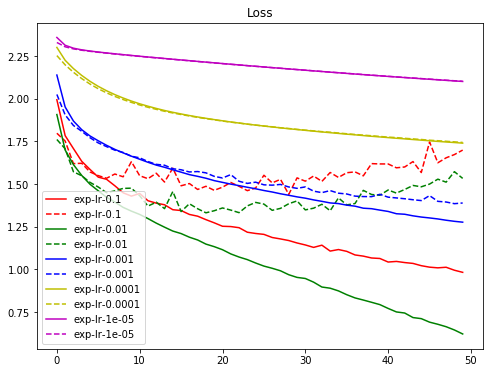

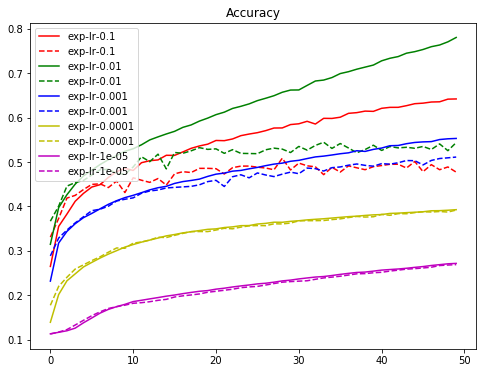

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()